In [327]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import mixture
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import normalize, StandardScaler
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

### Regression

In [136]:
x = np.random.randn(n)*100
y = np.random.randn(n)*100
noise = np.random.normal(0,1,n)
thetas = np.random.randn((2))
z = thetas[0]*x+thetas[1]*y+noise

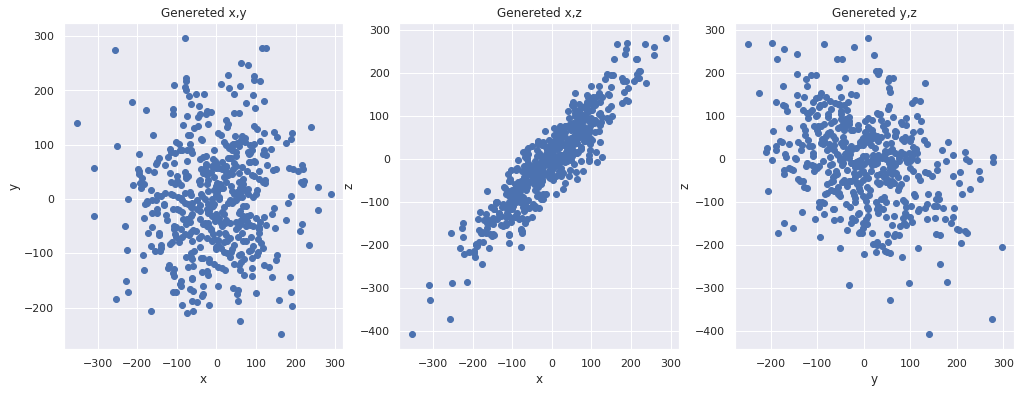

In [142]:
fig, axes = plt.subplots(1, 3, figsize=(15, 6))
fig.subplots_adjust(0.02)
ax1 = axes[0]
ax1.scatter(x,y)
ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.set_title("Genereted x,y")

ax2 = axes[1]
ax2.scatter(x,z)
ax2.set_xlabel("x")
ax2.set_ylabel("z")
ax2.set_title("Genereted x,z")

ax3 = axes[2]
ax3.scatter(y,z)
ax3.set_xlabel("y")
ax3.set_ylabel("z")
ax3.set_title("Genereted y,z");

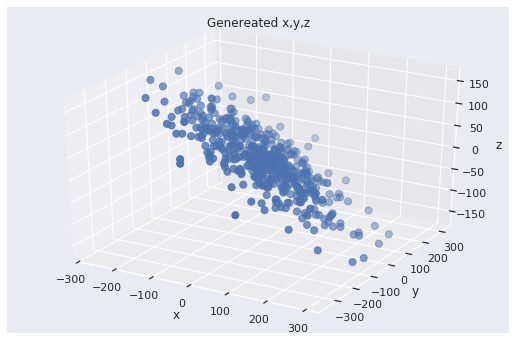

In [70]:
fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs=x, ys=y, zs=z, zdir='z', s=50, c=None, depthshade=True)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.set_title("Genereated x,y,z");

### PCA 

Explained variance ratio: 1.0


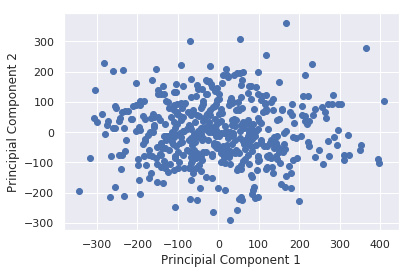

In [199]:
X = np.concatenate((x.reshape(-1,1),y.reshape(-1,1),y.reshape(-1,1)),axis=1)
pca = PCA(n_components=2)
pca.fit(X)

print("Explained variance ratio:",np.cumsum(pca.explained_variance_ratio_)[-1])
x_tr = pca.transform(X)

plt.scatter(x_tr[:,0],x_tr[:,1])
plt.xlabel("Principial Component 1")
plt.ylabel("Principial Component 2");


### Clusstering


In [262]:
x_1 = np.random.normal(0,5,n)
y_1 = np.random.normal(0,5,n)
noise = np.random.normal(0,1,n)
x_1 +=noise
y_1 +=noise

x_2 = np.random.normal(15,5,n)
y_2 = np.random.normal(15,5,n)
noise = np.random.normal(0,2,n)
x_2 +=noise
y_2 +=noise

x_3 = np.random.normal(33,5,n)
y_3 = np.random.normal(33,5,n)
noise = np.random.normal(0,1,n)
x_3 +=noise
y_3 +=noise

X = np.concatenate((x_1,x_2,x_3))
Y = np.concatenate((y_1,y_2,y_3))
C = np.concatenate((np.ones_like(x_1),2*np.ones_like(x_2),3*np.ones_like(x_3)),axis=0)
# z = thetas[0]*x+thetas[1]*y+noise

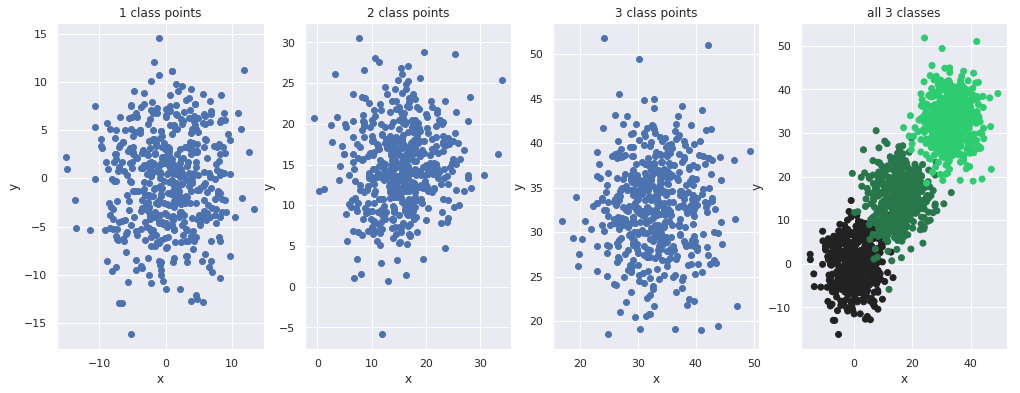

In [263]:
fig, axes = plt.subplots(1, 4, figsize=(15, 6))
fig.subplots_adjust(0.02)
ax1 = axes[0]
ax1.scatter(x_1,y_1)
ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.set_title("1 class points")

ax2 = axes[1]
ax2.scatter(x_2,y_2)
ax2.set_xlabel("x")
ax2.set_ylabel("y")
ax2.set_title("2 class points")

ax3 = axes[2]
ax3.scatter(x_3,y_3)
ax3.set_xlabel("x")
ax3.set_ylabel("y")
ax3.set_title("3 class points")

ax4 = axes[3]
cmap = sns.dark_palette("#2ecc71", as_cmap=True)
ax4.scatter(X,Y,c=C,cmap=cmap)
ax4.set_xlabel("x")
ax4.set_ylabel("y")
ax4.set_title("all 3 classes");

In [276]:
thetas = np.random.randn((3))
Z = X*thetas[0] + Y*thetas[1]+ thetas[2]

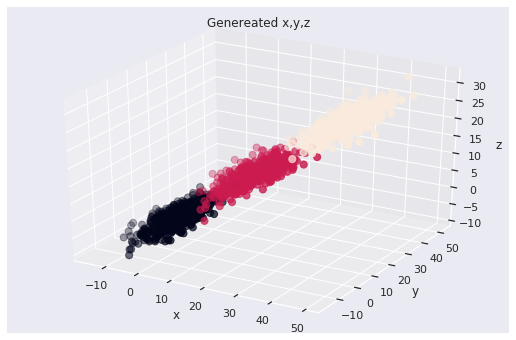

In [277]:
fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs=X, ys=Y, zs=Z, zdir='z', s=50, c=C, depthshade=True)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.set_title("Genereated x,y,z");

Explained variance ratio: 0.9999999999999999


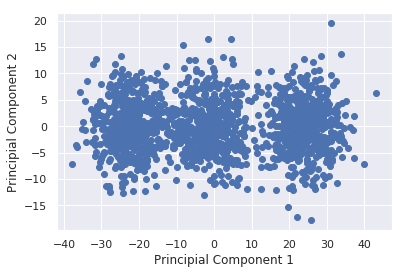

In [279]:
data = np.concatenate((X.reshape(-1,1),Y.reshape(-1,1)),axis=1)
pca = PCA(n_components=2)
pca.fit(data)

print("Explained variance ratio:",np.cumsum(pca.explained_variance_ratio_)[-1])
x_tr = pca.transform(data)

plt.scatter(x_tr[:,0],x_tr[:,1])
plt.xlabel("Principial Component 1")
plt.ylabel("Principial Component 2");


In [164]:
n = 500
m = 200
k = 75
X = np.zeros((n,m))

for i in range(k):
    X[:,i] = np.random.randn((n))*100

for i in range(k,m):
    ind = np.random.choice((np.arange((k))))
    thetas = np.random.randn((2))
    X[:,i] = X[:,ind]*thetas[0] + thetas[1]


In [166]:
X = pd.DataFrame(X)

X.head()

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,-104.071909,32.369673,-84.465238,76.827033,-39.727950,217.248592,9.527095,88.165331,128.619265,106.579131,...,-82.146560,-9.196452,74.138327,-31.915842,80.535712,-41.190927,-50.270176,-25.198510,4.902967,-263.282176
1,-171.620724,37.222010,-20.569900,-148.484348,-124.087014,-87.954534,-47.991532,94.275869,88.944915,144.500317,...,-31.221695,-66.070521,100.003130,-34.205581,30.153008,-53.682559,185.258837,43.579882,36.523904,34.652083
2,64.074857,-18.319197,64.797776,-63.517724,-8.301478,-130.709866,-134.016478,182.925670,132.556237,37.884741,...,11.924023,5.272839,-27.181437,23.000177,-12.533369,-20.068503,13.041824,-4.253282,-3.141692,-6.771237
3,-105.249432,68.426949,-119.411657,19.868267,205.170728,-119.372205,17.250250,54.474349,60.499702,136.015379,...,-0.219294,31.876097,-92.621876,-0.389354,-0.519332,-50.722117,-24.841801,-41.510329,-17.932614,84.223961
4,-10.930830,0.271814,-22.564031,56.742501,122.167815,26.012489,105.153264,-81.849246,-173.483806,3.702774,...,36.766871,105.679737,-21.744434,-18.274010,-37.111732,-11.155649,-40.145662,12.858324,-58.966082,28.020400


In [167]:
X.corr().head()

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,1.000000,-0.059016,-0.026817,0.033026,-0.061208,0.079923,-0.098496,0.026438,0.050718,-0.030894,...,0.027608,0.036588,0.028133,0.022563,-0.027608,-0.042018,0.020975,-0.014719,-0.036588,0.017293
1,-0.059016,1.000000,-0.014716,-0.058538,0.071873,0.040105,0.026465,-0.002114,-0.024412,-0.065379,...,-0.004123,-0.118704,0.035893,-0.023237,0.004123,0.024813,-0.026679,-0.025085,0.118704,0.007328
2,-0.026817,-0.014716,1.000000,-0.001740,0.041068,-0.027830,-0.006111,-0.054191,0.052027,-0.033300,...,0.035003,0.021005,0.065596,0.052316,-0.035003,-0.052535,-0.023695,0.084834,-0.021005,-0.042340
3,0.033026,-0.058538,-0.001740,1.000000,0.007945,0.011826,0.065105,-0.008726,0.017019,0.078184,...,0.027208,-0.011774,0.052626,-0.000206,-0.027208,-0.033871,-0.058092,-0.027948,0.011774,0.033665
4,-0.061208,0.071873,0.041068,0.007945,1.000000,0.007111,0.022869,0.037521,0.013038,0.032066,...,-0.047151,-0.008166,-0.001803,-0.017538,0.047151,0.043542,0.034363,-0.032502,0.008166,0.005559


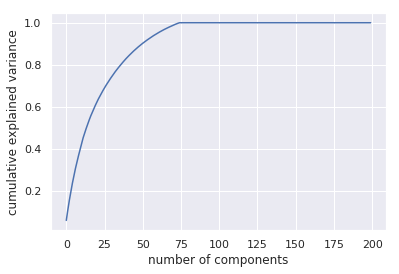

In [168]:
pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [169]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [180]:
digits["images"][0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

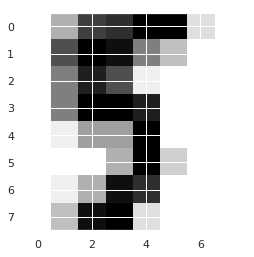

In [287]:
plt.imshow(digits["images"][15],cmap="binary");

In [333]:
pca = PCA(2)# project from 64 to 2 dimensions
projected = pca.fit_transform(digits.data)

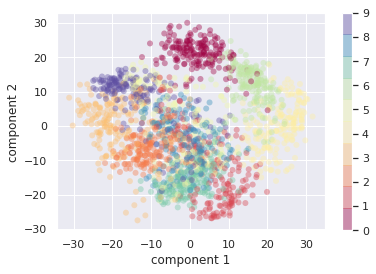

In [334]:
plt.scatter(projected[:, 0], projected[:, 1],
            c=digits.target, edgecolor='none', alpha=0.4,
            cmap=plt.cm.get_cmap('Spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();


In [335]:
def GMM(points,k=4,alpha=0.01):
    g = mixture.GaussianMixture(n_components=k)
    # gmm = GMM(n_components=4).fit(X)
    gmm = g.fit(points)
    labels = gmm.predict(points)
    plt.figure(figsize=(15,9))
    plt.scatter(points[:, 0], points[:, 1], c=labels, s=40, cmap='viridis',alpha=alpha);
    plt.show()
    return labels, gmm.means_

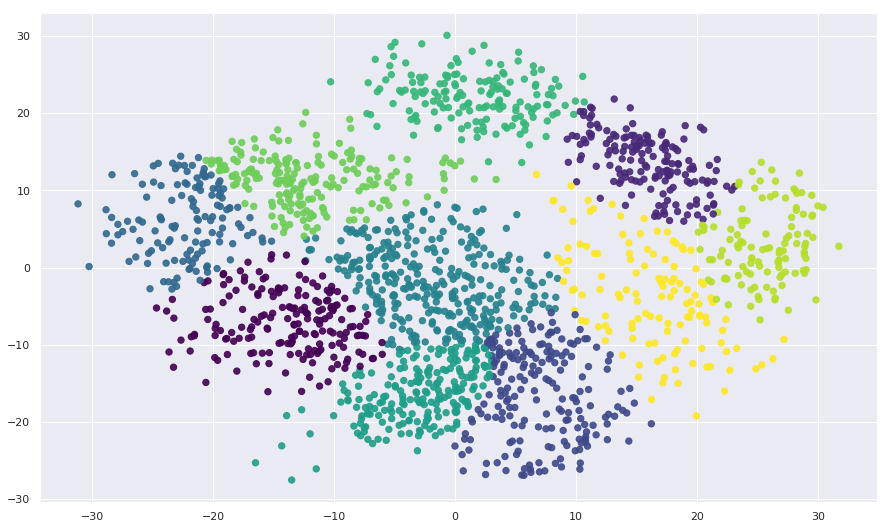

(array([6, 2, 2, ..., 9, 7, 4]), array([[-13.36882808,  -6.83011074],
        [ 15.92801324,  13.51004127],
        [  5.83466173, -15.44711077],
        [-21.35628901,   6.44215449],
        [ -2.15250483,  -2.20145377],
        [ -2.52630287, -15.92345793],
        [  1.70538143,  21.89826886],
        [-12.34860571,  10.76628616],
        [ 25.08146231,   2.81030093],
        [ 16.08968726,  -3.61957098]]))

In [293]:
GMM(projected,k=10,alpha=0.9)

In [316]:
std_scl = StandardScaler()
pca = PCA(2)# project from 64 to 2 dimensions
X_train,X_test,Y_train,Y_test = train_test_split(digits.data,digits.target)
pipline = Pipeline([("StandardScaler",std_scl),("PCA",pca),("gmm",mixture.GaussianMixture(n_components=10))])
pipline.fit(X_train,Y_train)

Pipeline(memory=None,
     steps=[('StandardScaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('gmm', GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
    ...var=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None))])

In [328]:
Y_pred = pipline.predict(X_test)

In [332]:
print(classification_report(Y_test,Y_pred))

             precision    recall  f1-score   support

          0       0.03      0.04      0.04        49
          1       0.00      0.00      0.00        45
          2       0.65      0.58      0.61        45
          3       0.00      0.00      0.00        44
          4       0.14      0.08      0.10        38
          5       0.11      0.17      0.13        40
          6       0.05      0.07      0.06        42
          7       0.62      0.49      0.55        53
          8       0.05      0.02      0.03        45
          9       0.12      0.12      0.12        49

avg / total       0.18      0.16      0.17       450



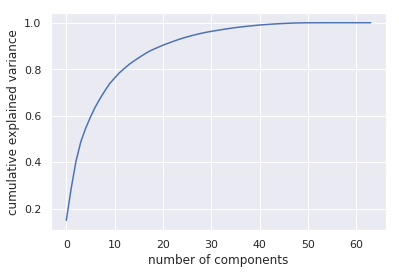

In [185]:
pca = PCA().fit(digits["data"])
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [340]:
std_scl = StandardScaler()
pca = PCA(36)# project from 64 to 2 dimensions
X_train,X_test,Y_train,Y_test = train_test_split(digits.data,digits.target)
pipline = Pipeline([("StandardScaler",std_scl),("PCA",pca),("gmm",mixture.GaussianMixture(n_components=10))])
pipline.fit(X_train,Y_train)

Pipeline(memory=None,
     steps=[('StandardScaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('PCA', PCA(copy=True, iterated_power='auto', n_components=36, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('gmm', GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
   ...var=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None))])

In [341]:
Y_pred = pipline.predict(X_test)

In [342]:
print(classification_report(Y_test,Y_pred))

             precision    recall  f1-score   support

          0       0.00      0.00      0.00        41
          1       0.00      0.00      0.00        42
          2       0.73      0.80      0.77        45
          3       0.00      0.00      0.00        42
          4       0.61      0.58      0.60        53
          5       0.01      0.03      0.02        39
          6       0.00      0.00      0.00        45
          7       0.00      0.00      0.00        50
          8       0.00      0.00      0.00        46
          9       0.00      0.00      0.00        47

avg / total       0.15      0.15      0.15       450



/home/garik/.virtualenvs/ml/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


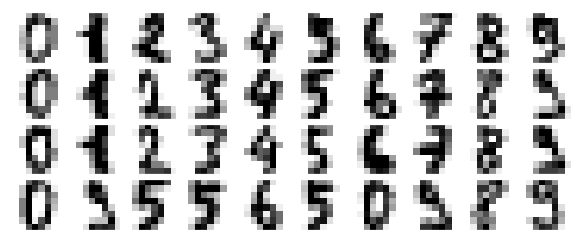

In [192]:
def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))
plot_digits(digits.data)

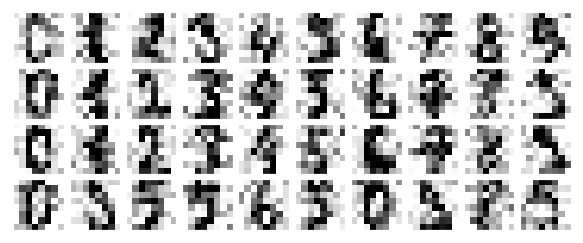

In [193]:
np.random.seed(42)
noisy = np.random.normal(digits.data, 4)
plot_digits(noisy)

In [204]:
pca = PCA(0.90).fit(noisy)
pca.n_components_

49

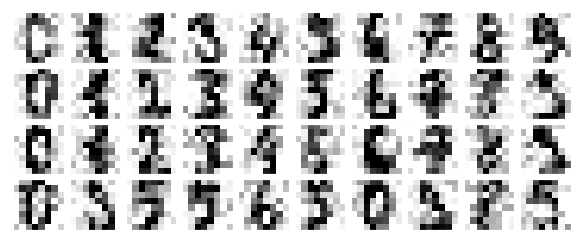

In [205]:
components = pca.transform(noisy)
filtered = pca.inverse_transform(components)
plot_digits(filtered)